# **Setting up**
This jupyter notebook has code used in anaysing the population structure from genetic data using pegas r package - "Population and Evolutionary Genetics Analysis System"

### **Testing and installing packages:**

In [3]:
requiredPackages = c("pegas","ape","adegenet","seqinr","diveRsity", "FinePop")
cat("\nChecking if needed packages are installed... 'pegas','ape'",
    "and 'adegenet'\nAnd their dependencies are ‘e1071’, ‘gtools’, ‘classInt’,",
    "‘units’, ‘gdata’, ‘httpuv’, ‘htmltools’, ‘later’, ‘promises’,",
    "‘rlang’, ‘fastmap’, ‘segmented’, ‘sp’, ‘spData’, ‘sf’, ‘deldir’,",
    "‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’, ‘permute’, ‘ade4’, ‘shiny’,",
    "‘seqinr’, ‘spdep’, ‘vegan’\nWill also install 'diveRsity' package",
    "along with its dependancies: ‘checkmate’, ‘tweenr’, ‘polyclip’,",
    "‘RcppArmadillo’, ‘mnormt’, ‘pbivnorm’, ‘Formula’, ‘latticeExtra’,",
    "‘acepack’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘RcppEigen’,",
    "‘rjson’, ‘ggforce’, ‘ggrepel’, ‘graphlayouts’, ‘psych’, ‘lavaan’,",
    "‘Hmisc’, ‘jpeg’, ‘png’, ‘corpcor’, ‘glasso’, ‘huge’, ‘fdrtool’,",
    "‘d3Network’, ‘ggm’, ‘BDgraph’, ‘pbapply’, ‘abind’, ‘tidygraph’,",
    "‘ggraph’, ‘qgraph’\nIncase of errors installing this packages,",
    "then kindly try to install them individually and trouble shoot any errors.\n")
for(p in requiredPackages)
        if(p %in% rownames(installed.packages()) == FALSE) {
        install.packages(p)
} else {
        cat("\nExcellent", p, " already installed. loading", p, "...")
        ## loads dplyr and magrittr packages
        suppressMessages(library(p, character.only = T))
}
cat("\nDone...\n")


Checking if needed packages are installed... 'pegas','ape' and 'adegenet'
And their dependencies are ‘e1071’, ‘gtools’, ‘classInt’, ‘units’, ‘gdata’, ‘httpuv’, ‘htmltools’, ‘later’, ‘promises’, ‘rlang’, ‘fastmap’, ‘segmented’, ‘sp’, ‘spData’, ‘sf’, ‘deldir’, ‘LearnBayes’, ‘coda’, ‘expm’, ‘gmodels’, ‘permute’, ‘ade4’, ‘shiny’, ‘seqinr’, ‘spdep’, ‘vegan’
Will also install 'diveRsity' package along with its dependancies: ‘checkmate’, ‘tweenr’, ‘polyclip’, ‘RcppArmadillo’, ‘mnormt’, ‘pbivnorm’, ‘Formula’, ‘latticeExtra’, ‘acepack’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘RcppEigen’, ‘rjson’, ‘ggforce’, ‘ggrepel’, ‘graphlayouts’, ‘psych’, ‘lavaan’, ‘Hmisc’, ‘jpeg’, ‘png’, ‘corpcor’, ‘glasso’, ‘huge’, ‘fdrtool’, ‘d3Network’, ‘ggm’, ‘BDgraph’, ‘pbapply’, ‘abind’, ‘tidygraph’, ‘ggraph’, ‘qgraph’
Incase of errors installing this packages, then kindly try to install them individually and trouble shoot any errors.

Excellent pegas  already installed. loading pegas ...
Excellent ape  already instal

### **Loading Data**
Here we load the data file into an R object called input_fa and use the APE R package to read the fasta files: `ape::read.dna()`. The package by default calculates the Base Composition.

In [12]:
?as.matrix.DNAbin

DNAbin {ape},R Documentation
"x, object","an object of class ""DNAbin""."
...,"either further arguments to be passed to or from other methods in the case of print, as.matrix, and labels, or a series of objects of class ""DNAbin"" in the case of rbind, cbind, and c."
printlen,the number of labels to print (6 by default).
digits,the number of digits to print (3 by default).
check.names,a logical specifying whether to check the rownames before binding the columns (see details).
fill.with.gaps,"a logical indicating whether to keep all possible individuals as indicating by the rownames, and eventually filling the missing data with insertion gaps (ignored if check.names = FALSE)."
quiet,a logical to switch off warning messages when some rows are dropped.
"i, j","indices of the rows and/or columns to select or to drop. They may be numeric, logical, or character (in the same way than for standard R objects)."
drop,"logical; if TRUE, the returned object is of the lowest possible dimension."
recursive,for compatibility with the generic (unused).


In [4]:
setwd("/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/")
input_fa <- "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/Phlebotomus_133_ed.fasta"
d.fa <- ape::read.dna(input_fa, format='fasta')
d.fa

133 DNA sequences in binary format stored in a matrix.

All sequences of same length: 658 

Labels:
sp-Phlebotomus_ariasi-.-country-Algeria
sp-Phlebotomus_ariasi-.-country-Algeria
sp-Phlebotomus_ariasi-.-country-Algeria
sp-Phlebotomus_chadlii-.-country-Algeria
sp-Phlebotomus_chadlii-.-country-Algeria
sp-Phlebotomus_chadlii-.-country-Algeria
...

Base composition:
    a     c     g     t 
0.287 0.175 0.163 0.375 
(Total: 87.51 kb)

### **Pairwise Distances**

Calculation of the pairwise distances between individual sequences `ape::dist.dna()`.  
It "computes a matrix of pairwise distances from DNA sequences using a model of DNA
evolution. Eleven substitution models (and the raw distance) are currently available"

In [8]:
d <- ape::dist.dna(d.fa, model="K80")
#d

### **Haplotype Extraction and Frequencies**

The identification of haplotypes and friquencies is done using `pegas::haplotype()` function of the pegas R package

In [9]:
h <- pegas::haplotype(d.fa)
#h1 <- sort(h, what = "freq")
h
#h1
#print.default(h)


Haplotypes extracted from: d.fa 

    Number of haplotypes: 71 
         Sequence length: 658 

Haplotype labels and frequencies:

      I      II     III      IV       V      VI     VII    VIII      IX       X 
      3       1       1       1       1       1       1      19       1       1 
     XI     XII    XIII     XIV      XV     XVI    XVII   XVIII     XIX      XX 
      1       1       1       1       1       1       1       2       1       1 
    XXI    XXII   XXIII    XXIV     XXV    XXVI   XXVII  XXVIII    XXIX     XXX 
      3       1      19       1       1       1       1       1       1       1 
   XXXI   XXXII  XXXIII   XXXIV    XXXV   XXXVI  XXXVII XXXVIII   XXXIX      XL 
      1       1       1       2       1       1       1      14       1       1 
...
(use summary() to print all)

### **Haplotype Network**  
Here we generate the haplotype network using `pegas::haploNet()` function  
And plot it using `plot()` function  

Haplotype network with:
  71 haplotypes
  804 links
  link lengths between 1 and 82 steps

Use print.default() to display all elements.

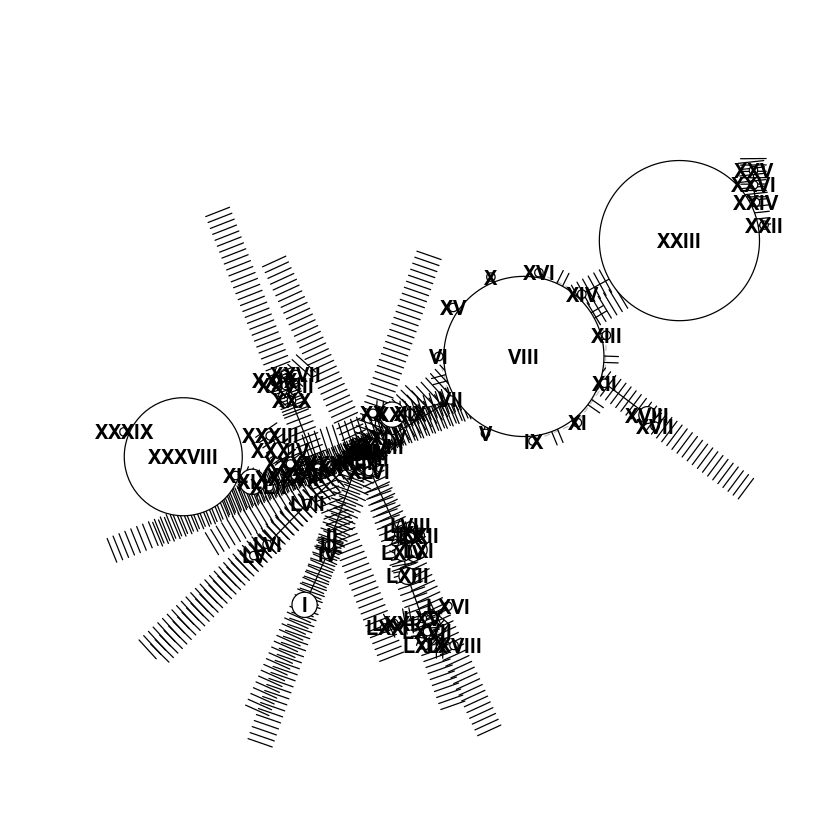

In [7]:
net <- pegas::haploNet(h, getProb = TRUE)
net
#print.default(net)
plot(net, size =attr(net, "freq"), cex=1, scale.ratio=0.1, fast = FALSE)

### **Haplotypes**  
To determine which sample belong to which haplotype we do as follows:  
```
> ind.hap<-with
+     stack(setNames(attr(h, “index”), rownames(h))),
+     table(hap=ind, pop=rownames(d.fa)[values])
+ )
```
**N/B:** However, with many samples that have unique names the resulting table may be so huge that it needs further processing as shown  below.

In [10]:
ind.hap<-with(
    stack(setNames(attr(h, "index"), rownames(h))),
    table(hap=ind, pop=rownames(d.fa)[values])
)
mydata <- as.data.frame(ind.hap)
good <- mydata[mydata$Freq == 1,]
good
#ind.hap

,hap,pop,Freq
,<fct>,<fct>,<int>
36,XXXVI,sp-NA-.-country-Egypt,1
37,XXXVII,sp-NA-.-country-Egypt,1
110,XXXIX,sp-NA-.-country-Kenya,1
111,XL,sp-NA-.-country-Kenya,1
180,XXXVIII,sp-NA-.-country-Senegal,1
327,XLIII,sp-Phlebotomus_alexandri-.-country-Algeria,1
328,XLIV,sp-Phlebotomus_alexandri-.-country-Algeria,1
329,XLV,sp-Phlebotomus_alexandri-.-country-Algeria,1
330,XLVI,sp-Phlebotomus_alexandri-.-country-Algeria,1


### **Haplotype Networks with pie charts**  
The pie charts can be devided and coloured based on any thinkable population structure:  
1. location
2. Species-name*

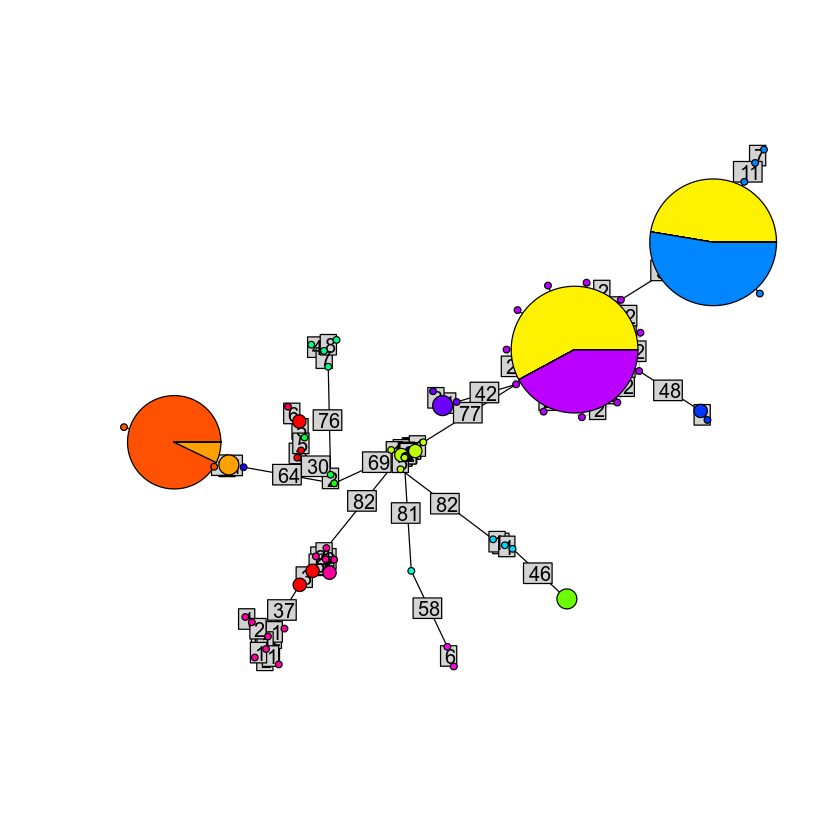

In [37]:
plot(net, size =attr(net, "freq"), col = "black",
     col.link = "black", lwd = 1, lty = 1, pie=ind.hap,
     labels = FALSE, font = 1, cex = 1, scale.ratio = 0.2,
     asp = 1, fast = F, show.mutation = 3,
     threshold = c(1, 2))
#legend("bottomright", colnames(ind.hap), col=rainbow(ncol(ind.hap)),
#       pch=19, ncol=1, inset = c(3,3))

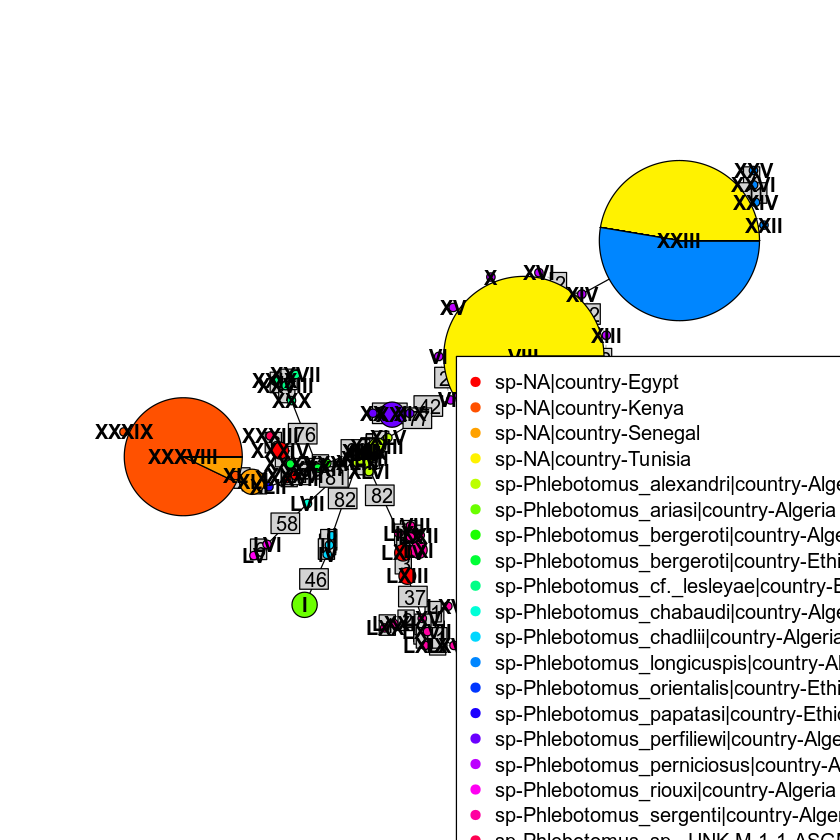

In [8]:
plot(net, size=attr(net, "freq"), scale.ratio=0.1,
     show.mutation=3, pie=ind.hap, fast=F)
legend(-8, 0, colnames(ind.hap), col=rainbow(ncol(ind.hap)), pch=19, ncol=1)

In [7]:
locations <- strsplit(as.character(good$pop),"|", fixed=T)
#locations[[1]]
species <- sapply(locations, "[[", 1)
#countries <- sapply(locations, "[[", 2)
#countries <- strsplit(as.character(countries), "-", fixed=T)
countries <- sapply((strsplit(as.character(sapply(locations, "[[", 2)), "-", fixed=T)), "[[", 2)
species[1:10]
countries[1:10]

[1] "sp-NA"                    "sp-NA"                   
 [3] "sp-NA"                    "sp-NA"                   
 [5] "sp-NA"                    "sp-Phlebotomus_alexandri"
 [7] "sp-Phlebotomus_alexandri" "sp-Phlebotomus_alexandri"
 [9] "sp-Phlebotomus_alexandri" "sp-Phlebotomus_alexandri"

[1] "Egypt"   "Egypt"   "Kenya"   "Kenya"   "Senegal" "Algeria" "Algeria"
 [8] "Algeria" "Algeria" "Algeria"

In [10]:
new_sp.hap <- table(good$hap, species)
new_country.hap <- table(good$hap, countries)
head(new_country.hap, 10)
head(new_sp.hap)

      countries
       Algeria Egypt Ethiopia Kenya Senegal
  I          0     0        0     0       0
  II         1     0        0     0       0
  III        1     0        0     0       0
  IV         1     0        0     0       0
  V          1     0        0     0       0
  VI         1     0        0     0       0
  VII        1     0        0     0       0
  VIII       0     0        0     0       0
  IX         1     0        0     0       0
  X          1     0        0     0       0

     species
      sp-NA sp-Phlebotomus_alexandri sp-Phlebotomus_bergeroti
  I       0                        0                        0
  II      0                        0                        0
  III     0                        0                        0
  IV      0                        0                        0
  V       0                        0                        0
  VI      0                        0                        0
     species
      sp-Phlebotomus_cf._lesleyae sp-Phlebotomus_chabaudi
  I                             0                       0
  II                            0                       0
  III                           0                       0
  IV                            0                       0
  V                             0                       0
  VI                            0                       0
     species
      sp-Phlebotomus_chadlii sp-Phlebotomus_longicuspis
  I                        0                          0
  II     

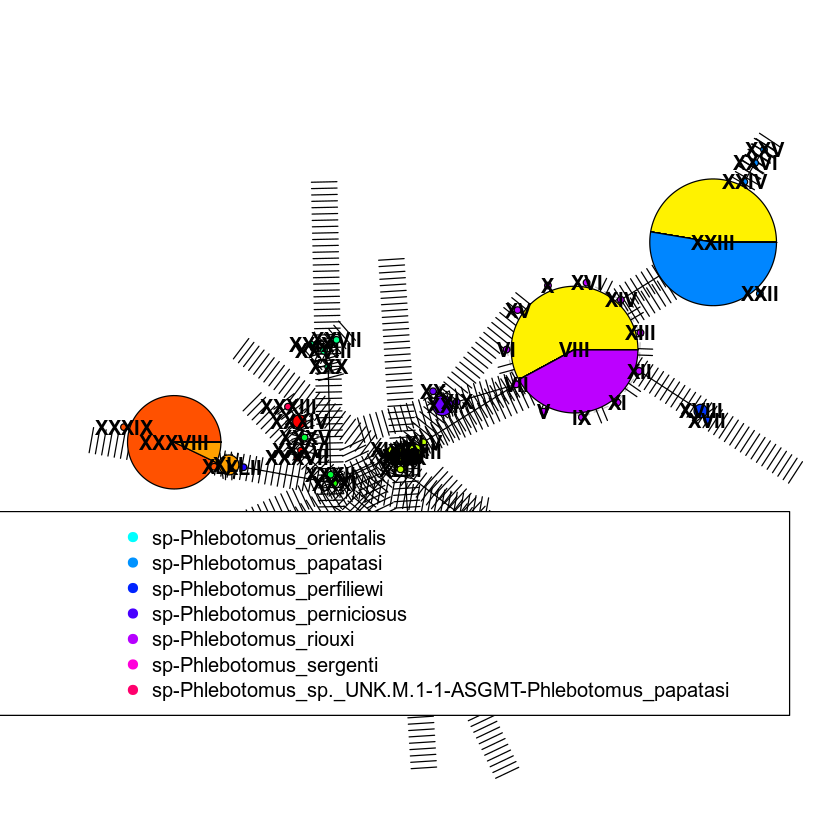

In [43]:
plot(net, size=attr(net, "freq"), scale.ratio=0.2, pie=ind.hap)
legend("bottomright", colnames(new_sp.hap), col=rainbow(ncol(new_sp.hap)), pch=19, ncol=2)

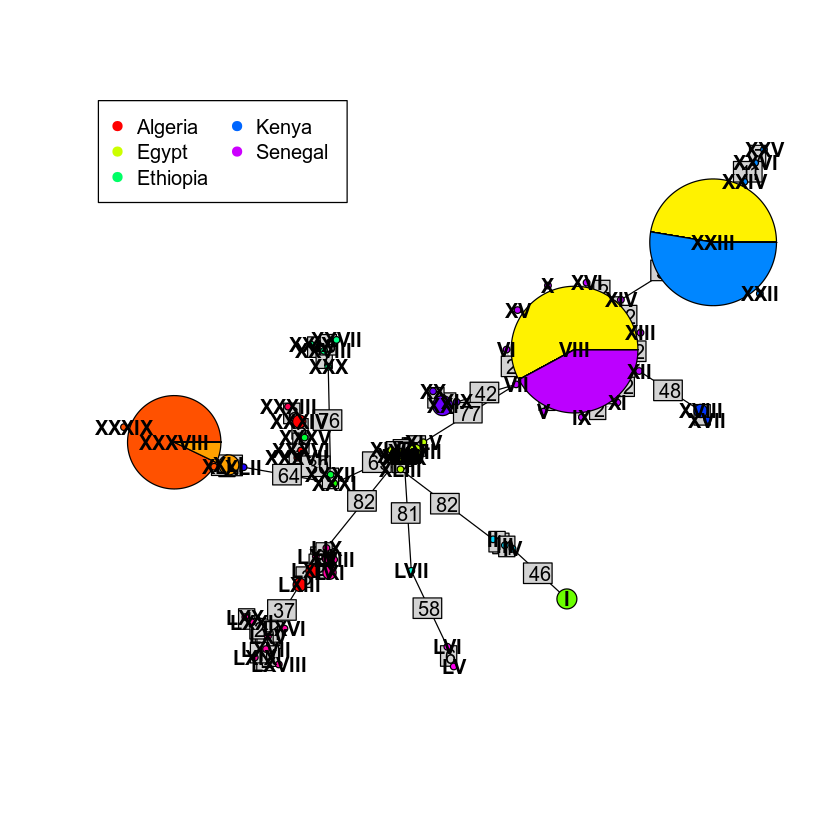

In [39]:
plot(net, size=attr(net, "freq"), scale.ratio=0.2, pie=ind.hap,show.mutation = 3)
legend("topleft", colnames(new_country.hap), col=rainbow(ncol(new_country.hap)), pch=19, ncol=2)

Work in progress!!!
### **Building and distributing diveRsity R package with conda**  
**WORK IN PROGRESS**  
**N/B:** Build r-qgraph package first (a diveRsity dependancy)
For reference go to [How to compile and distribute an R package with conda](https://tobiasraabe.github.io/blog/how-to-compile-and-distribute-an-r-package-with-conda.html)  
First command: create a folder called r-mice which contains three files, `bld.bat`, `build.sh` and `meta.yml`.  
`conda skeleton cran r-diveRsity`  
Second command: the next step is to compile the package  
`conda build r-mice`  
Third command:  

### **Converting Sequence Fasta-file-format to nexus-file-format**  

In [11]:
getwd()
d.fas <- seqinr::read.fasta(input_fa)
#d.fas
write.nexus.data(d.fas, file="./d_fas.nexus", format="dna", interleaved=F)

[1] "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle"

### **Converting fasta to genpop gormat**  


[1] "DNAbin"

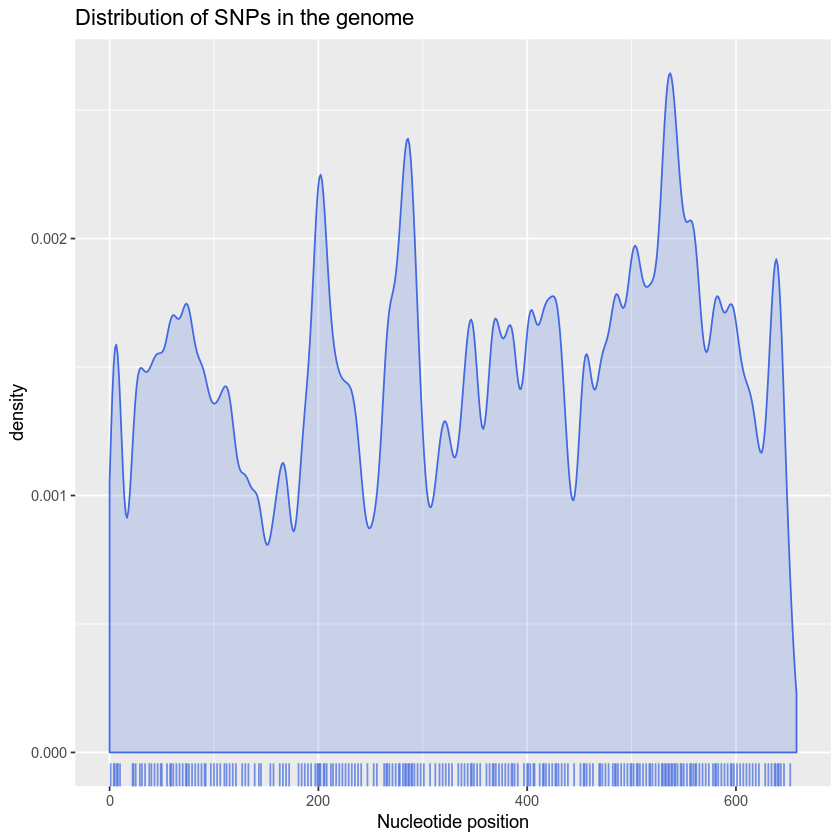

In [17]:
class(d.fa)
myDNA <- as.matrix.DNAbin(d.fa)
#ploting SNP density along the alignment
snpposi.plot(myDNA,codon=FALSE)

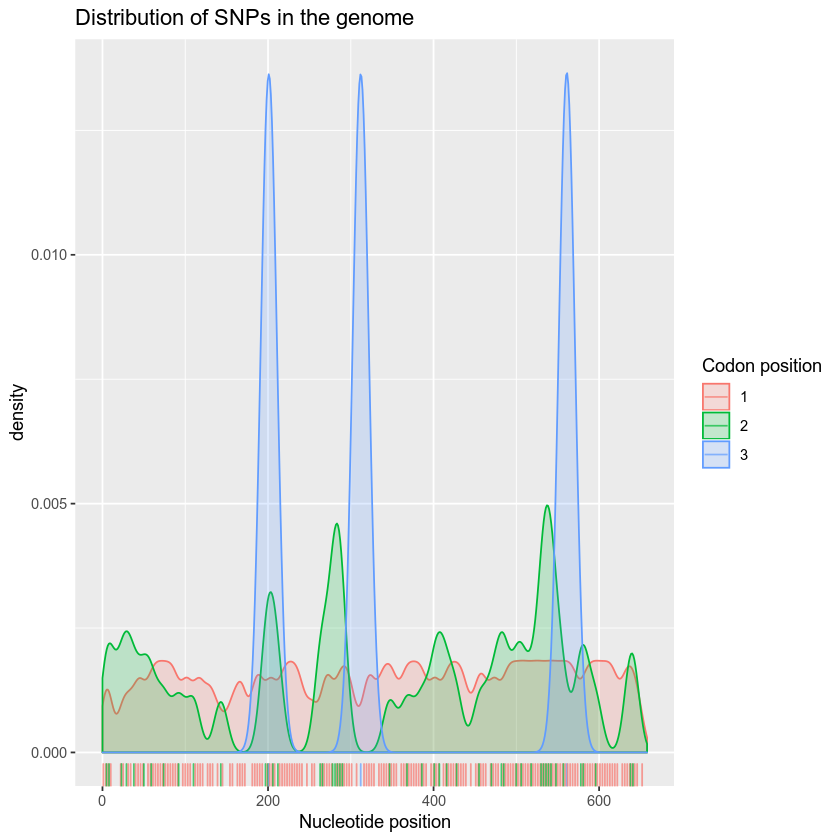

In [18]:
#testing whether these SNPs are randomly distributed
snpposi.plot(myDNA)

In [23]:
#forming a genind object: only polymorphic loci for alleles with frequency over polyTres=?
myDNA.genind <- DNAbin2genind(myDNA, polyThres=0.00)
myDNA.genind

Warning message in .local(.Object, ...):
“duplicate labels detected for some individuals; using generic labels”


/// GENIND OBJECT /////////

 // 133 individuals; 231 loci; 565 alleles; size: 436.5 Kb

 // Basic content
   @tab:  133 x 565 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-4)
   @loc.fac: locus factor for the 565 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 1-1)
   @type:  codom
   @call: DNAbin2genind(x = myDNA, polyThres = 0)

 // Optional content
   - empty -

In [24]:
class(myDNA.genind)
myDNA.genpop <- genind2genpop(myDNA.genind)
class(myDNA.genpop)
myDNA.genpop

[1] "genind"
attr(,"package")
[1] "adegenet"

Warning message in genind2genpop(myDNA.genind):
“
pop is not provided either in x or in pop - assuming one single group”



 Converting data from a genind to a genpop object... 

...done.



[1] "genpop"
attr(,"package")
[1] "adegenet"

/// GENPOP OBJECT /////////

 // 1 population; 231 loci; 565 alleles; size: 135.7 Kb

 // Basic content
   @tab:  1 x 565 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-4)
   @loc.fac: locus factor for the 565 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 1-1)
   @type:  codom
   @call: genind2genpop(x = myDNA.genind)

 // Optional content
   - empty -

In [33]:
popNames(myDNA.genpop)
print.default(myDNA.genpop$other)

[1] "1"

NULL


### **Testing for Phylogeographic differentiation using `diveRsity::fastDivPart()` function**  
Input files are genpop format generated using PGDSpider

In [6]:
data(Test_data, package = "diveRsity")
#Test_data
div_results <- fastDivPart(infile = Test_data, outfile = "Test",
                       gp = 3, pairwise = TRUE,
                       fst = TRUE, bs_locus = TRUE,
                       bs_pairwise = TRUE, boots = 100,
                       plot = FALSE, para = TRUE)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38
<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
BLANK,,,,,,,,,,⋯,,,,,,,,,,
Locus1,,,,,,,,,,⋯,,,,,,,,,,
Locus2,,,,,,,,,,⋯,,,,,,,,,,
Locus3,,,,,,,,,,⋯,,,,,,,,,,
Locus4,,,,,,,,,,⋯,,,,,,,,,,
Locus5,,,,,,,,,,⋯,,,,,,,,,,
Locus6,,,,,,,,,,⋯,,,,,,,,,,
Locus7,,,,,,,,,,⋯,,,,,,,,,,
Locus8,,,,,,,,,,⋯,,,,,,,,,,


 
 
[NOTE]
___________________________________________________________
Please install the package 'xlsx' if you would like your
results written to an Excel workbook.
Alternatively, your result will automatically be written
to .txt files.
___________________________________________________________
To install 'xlsx' use:
> install.packages('xlsx', dependencies=TRUE)
See:
> ?install.packages - for usage details.
___________________________________________________________ 
 
[NOTE]
___________________________________________________________
Please make sure the packages 'parallel', 'doParallel',
'foreach' and 'iterators' are installed. These are required
 to run your analysis in parallel.
Your analysis will be run sequentially!
___________________________________________________________
To install these use:
> install.packages()
See:
> ?install.packages - for usage details.
___________________________________________________________

In [2]:
input_gen <- "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/genpop_test02.gen"
#input_gen
fastDivPart(infile = input_gen, outfile = "diveRsity",
            gp = 3, pairwise = TRUE, 
            fst = TRUE, bs_locus = TRUE,
            bs_pairwise = TRUE,
            boots = 100, para = TRUE)

 
 
[NOTE]
___________________________________________________________
Please install the package 'xlsx' if you would like your
results written to an Excel workbook.
Alternatively, your result will automatically be written
to .txt files.
___________________________________________________________
To install 'xlsx' use:
> install.packages('xlsx', dependencies=TRUE)
See:
> ?install.packages - for usage details.
___________________________________________________________ 
 
[NOTE]
___________________________________________________________
Please make sure the packages 'parallel', 'doParallel',
'foreach' and 'iterators' are installed. These are required
 to run your analysis in parallel.
Your analysis will be run sequentially!
___________________________________________________________
To install these use:
> install.packages()
See:
> ?install.packages - for usage details.
___________________________________________________________

$standard
            H_st   D_st   G_st G_hed_st D_jost
MicroSat1 0.1271 0.0391 0.0534   0.2941 0.2543
Microsat2 0.1154 0.0417 0.0612   0.2778 0.2307
Est-3     0.1183 0.0339 0.0454   0.2712 0.2366
Global        NA     NA 0.0531   0.2805 0.2400

$estimate
          Harmonic_N H_st_est D_st_est G_st_est G_hed_st_est D_Jost_est  Fst_WC
MicroSat1        4.8  -0.0053  -0.0012  -0.0016      -0.0122    -0.0106  0.0289
Microsat2        4.0  -0.0148  -0.0040  -0.0055      -0.0353    -0.0297  0.0492
Est-3            4.8  -0.0373  -0.0076  -0.0096      -0.0850    -0.0747 -0.0008
Global            NA       NA       NA  -0.0055      -0.0416    -0.0220  0.0252
           Fit_WC
MicroSat1 -0.2684
Microsat2 -0.3770
Est-3     -0.1576
Global    -0.2652

$pairwise
$pairwise$gstEst
             RueDuQuai Benitier
RueDuQuai           NA       NA
Benitier  -0.005601075       NA

$pairwise$gstEstHed
            RueDuQuai Benitier
RueDuQuai          NA       NA
Benitier  -0.04240308       NA

$pairwise$djostEst
            RueDuQuai Benitier
RueDuQuai          NA       NA
Benitier  -0.02200538       NA

$pairwise$thetaWC
          RueDuQuai Benitier
RueDuQuai        NA       NA
Benitier   0.025239       NA


$meanPairwise
$meanPairwise$gstEst
[1] -0.005601075

$meanPairwise$gstEstHed
[1] -0.04240308

$meanPairwise$djostEst
[1] -0.02200538

$meanPairwise$thetaWC
[1] 0.025239


$bs_locus
$bs_locus$Gst
            Mean Lower_CI Upper_CI
MicroSat1 0.0673   0.0172   0.1559
Microsat2 0.0768   0.0182   0.1946
Est-3     0.0766   0.0101   0.1679
global    0.0741   0.0298   0.1362

$bs_locus$G_hed_st
            Mean Lower_CI Upper_CI
MicroSat1 0.3195   0.0768   0.7043
Microsat2 0.3120   0.0649   0.7713
Est-3     0.3624   0.0538   0.6795
global    0.3318   0.1311   0.6192

$bs_locus$D_Jost
            Mean Lower_CI Upper_CI
MicroSat1 0.2763   0.0595   0.6507
Microsat2 0.2626   0.0476   0.7098
Est-3     0.3155   0.0441   0.6216
global    0.2821   0.1037   0.5620

$bs_locus$Gst_est
            Mean Lower_CI Upper_CI
MicroSat1 0.0125  -0.0378   0.1019
Microsat2 0.0005  -0.0858   0.1038
Est-3     0.0218  -0.0449   0.1140
global    0.0156  -0.0385   0.0875

$bs_locus$G_hed_st_est
             Mean Lower_CI Upper_CI
MicroSat1  0.0805  -0.2313   0.6025
Microsat2 -0.0181  -0.8351   0.5063
Est-3      0.1250  -0.2706   0.5742
global     0.0760  -0.2173   0.4891

$bs_locus$D_Jost_est
             Mean Lower_CI Upper_CI
MicroSat1  0.0759  -0.1865   0.5586
Microsat2 -0.0074  -0.7053   0.4602
Est-3      0.1146  -0.2143   0.5314
global     0.0441  -0.1398   0.3619

$bs_locus$Fst_WC
            Mean Lower_CI Upper_CI
MicroSat1 0.0619  -0.0260   0.2090
Microsat2 0.0649  -0.0778   0.2539
Est-3     0.0587  -0.0759   0.2091
global    0.0644  -0.0311   0.1918

$bs_locus$Fit_WC
             Mean Lower_CI Upper_CI
MicroSat1 -0.3036  -0.5983   0.4342
Microsat2 -0.3859  -0.6753   0.5200
Est-3     -0.0975  -0.3204   1.0000
global    -0.2515  -0.4582   0.7748


$bs_pairwise
$bs_pairwise$gstEst
                             actual       mean      BC_mean Lower_95%CI
RueDuQuai vs. Benitier -0.005601075 0.01503489 -0.005601075 -0.03762656
                       Upper_95%CI BC_Lower_95%CI BC_Upper_95%CI
RueDuQuai vs. Benitier  0.07623663    -0.05826253     0.05560067

$bs_pairwise$gstEstHed
                            actual       mean     BC_mean Lower_95%CI
RueDuQuai vs. Benitier -0.04240308 0.09450946 -0.04240308   -0.237183
                       Upper_95%CI BC_Lower_95%CI BC_Upper_95%CI
RueDuQuai vs. Benitier   0.4702017     -0.3740956      0.3332891

$bs_pairwise$djostEst
                            actual      mean     BC_mean Lower_95%CI
RueDuQuai vs. Benitier -0.02200538 0.0618712 -0.02200538  -0.1706984
                       Upper_95%CI BC_Lower_95%CI BC_Upper_95%CI
RueDuQuai vs. Benitier   0.3638622      -0.254575      0.2799856

$bs_pairwise$thetaWC
                         actual       mean  BC_mean Lower_95%CI Upper_95%CI
RueDuQuai vs. Benitier 0.025239 0.07433497 0.025239 -0

In [5]:
input_gen <- "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/genpop_test04.gen"
#input_gen
fastDivPart(infile = input_gen, outfile = "diveRsity",
            gp = 3, pairwise = TRUE, 
            fst = TRUE, bs_locus = TRUE,
            bs_pairwise = TRUE,
            boots = 100, para = TRUE)

 
 
[NOTE]
___________________________________________________________
Please install the package 'xlsx' if you would like your
results written to an Excel workbook.
Alternatively, your result will automatically be written
to .txt files.
___________________________________________________________
To install 'xlsx' use:
> install.packages('xlsx', dependencies=TRUE)
See:
> ?install.packages - for usage details.
___________________________________________________________ 
 
[NOTE]
___________________________________________________________
Please make sure the packages 'parallel', 'doParallel',
'foreach' and 'iterators' are installed. These are required
 to run your analysis in parallel.
Your analysis will be run sequentially!
___________________________________________________________
To install these use:
> install.packages()
See:
> ?install.packages - for usage details.
___________________________________________________________

$standard
           H_st   D_st   G_st G_hed_st D_jost
MicroSat 0.1271 0.0391 0.0534   0.2941 0.2543
Global       NA     NA 0.0534   0.2942 0.2545

$estimate
         Harmonic_N H_st_est D_st_est G_st_est G_hed_st_est D_Jost_est  Fst_WC
MicroSat        4.8  -0.0053  -0.0012  -0.0016      -0.0122    -0.0106 -0.1038
Global           NA       NA       NA  -0.0016      -0.0125    -0.0106 -0.1038
         Fit_WC
MicroSat  0.745
Global    0.745

$pairwise
$pairwise$gstEst
             RueDuQuai Benitier
RueDuQuai           NA       NA
Benitier  -0.001568874       NA

$pairwise$gstEstHed
           RueDuQuai Benitier
RueDuQuai         NA       NA
Benitier  -0.0122694       NA

$pairwise$djostEst
            RueDuQuai Benitier
RueDuQuai          NA       NA
Benitier  -0.01068376       NA

$pairwise$thetaWC
           RueDuQuai Benitier
RueDuQuai         NA       NA
Benitier  0.02890173       NA


$meanPairwise
$meanPairwise$gstEst
[1] -0.001568874

$meanPairwise$gstEstHed
[1] -0.0122694

$meanPairwise$djostEst
[1] -0.01068376

$meanPairwise$thetaWC
[1] 0.02890173


$bs_locus
$bs_locus$Gst
           Mean Lower_CI Upper_CI
MicroSat 0.0791   0.0172   0.1534
global   0.0791   0.0172   0.1534

$bs_locus$G_hed_st
           Mean Lower_CI Upper_CI
MicroSat 0.3920   0.0795   0.7763
global   0.3919   0.0794   0.7761

$bs_locus$D_Jost
           Mean Lower_CI Upper_CI
MicroSat 0.3471   0.0634   0.7378
global   0.3471   0.0635   0.7376

$bs_locus$Gst_est
           Mean Lower_CI Upper_CI
MicroSat 0.0243  -0.0378   0.0994
global   0.0243  -0.0378   0.0994

$bs_locus$G_hed_st_est
           Mean Lower_CI Upper_CI
MicroSat 0.1645  -0.2313   0.6831
global   0.1644  -0.2312   0.6832

$bs_locus$D_Jost_est
           Mean Lower_CI Upper_CI
MicroSat 0.1527  -0.1865   0.6508
global   0.1527  -0.1865   0.6508

$bs_locus$Fst_WC
            Mean Lower_CI Upper_CI
MicroSat -0.0214  -0.1566   0.1291
global   -0.0214  -0.1566   0.1291

$bs_locus$Fit_WC
          Mean Lower_CI Upper_CI
MicroSat 0.525  -0.0392   0.8839
global   0.525  -0.0392   0.8839


$bs_pairwise
$bs_pairwise$gstEst
                             actual       mean      BC_mean Lower_95%CI
RueDuQuai vs. Benitier -0.001568874 0.02294642 -0.001568874 -0.02906554
                       Upper_95%CI BC_Lower_95%CI BC_Upper_95%CI
RueDuQuai vs. Benitier   0.1155293    -0.05358083       0.091014

$bs_pairwise$gstEstHed
                           actual      mean    BC_mean Lower_95%CI Upper_95%CI
RueDuQuai vs. Benitier -0.0122694 0.1514789 -0.0122694   -0.166829   0.7653775
                       BC_Lower_95%CI BC_Upper_95%CI
RueDuQuai vs. Benitier     -0.3305773      0.6016293

$bs_pairwise$djostEst
                            actual      mean     BC_mean Lower_95%CI
RueDuQuai vs. Benitier -0.01068376 0.1407184 -0.01068376  -0.1377737
                       Upper_95%CI BC_Lower_95%CI BC_Upper_95%CI
RueDuQuai vs. Benitier   0.7333496     -0.2891759      0.5819474

$bs_pairwise$thetaWC
                           actual       mean    BC_mean  Lower_95%CI
RueDuQuai vs. Benitier 0.02890173 0.08027279 0.02890173 -0.006427916
                       Upper_95%CI BC_Lower_95%CI BC_Upper_95%CI
RueDuQuai vs. Benitier   0.2373824    -0.05779897      0.1860113


$bs_pairwise_loci
$bs_pairwise_loci$gstEst
$bs_pairwise_loci$gstEst$MicroSat
                             actual       lower    upper
RueDuQuai vs. Benitier -0.001568874 -0.05358083 0.091014


$bs_pairwise_loci$gstEstHed
$bs_pairwise_loci$gstEstHed$MicroSat
                           actual      lower     upper
RueDuQuai vs. Benitier -0.0122694 -0.3305773 0.6016293


$bs_pairwise_loci$djostEst
$bs_pairwise_loci$djostEst$MicroSat
                            actual      lower     upper
RueDuQuai vs. Benitier -0.01068376 -0.2891759 0.5819474


$bs_pairwise_loci$thetaWC
$bs_pairwise_loci$thetaWC$MicroSat
                           actual       lower     upper
RueDuQuai vs. Benitier 0.02890173 -0.05779897 0.1860113

In [7]:
input_gen <- "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/genpop_test05.gen"
#input_gen
fastDivPart(infile = input_gen, outfile = "diveRsity",
            gp = 3, pairwise = TRUE, 
            fst = TRUE, bs_locus = TRUE,
            bs_pairwise = TRUE,
            boots = 100, para = TRUE)

ERROR: Error in allele_names[[i]]: subscript out of bounds


In [3]:
input_gen <- "/home/kibet/bioinformatics/github/co1_metaanalysis/data/input/Phle/genpop_test03.gen"
#input_gen
fastDivPart(infile = input_gen, outfile = "diveRsity",
            gp = 3, pairwise = TRUE, 
            fst = TRUE, bs_locus = TRUE,
            bs_pairwise = TRUE,
            boots = 100, para = TRUE)

 
 
[NOTE]
___________________________________________________________
Please install the package 'xlsx' if you would like your
results written to an Excel workbook.
Alternatively, your result will automatically be written
to .txt files.
___________________________________________________________
To install 'xlsx' use:
> install.packages('xlsx', dependencies=TRUE)
See:
> ?install.packages - for usage details.
___________________________________________________________ 
 
[NOTE]
___________________________________________________________
Please make sure the packages 'parallel', 'doParallel',
'foreach' and 'iterators' are installed. These are required
 to run your analysis in parallel.
Your analysis will be run sequentially!
___________________________________________________________
To install these use:
> install.packages()
See:
> ?install.packages - for usage details.
___________________________________________________________

ERROR: Error in lapply(pop_list, plMake): object 'plMake' not found
